In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Import the dataset
nikeSet = pd.read_csv('../nike_shoes_sales.csv')
nikeSet.head(20)
#Already looking at the set we can get rid of unneccessary columns

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
5,Nike Free Metcon 3,CJ6314-146,0,9995,0,Nike,The Nike Free Metcon 3 combines the flexibilit...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
6,NikeCourt Blanc,CI0808-100,0,5995,0,Nike,"Inspired by heritage models, the NikeCourt Bla...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
7,Nike Free Metcon 3,CJ0861-017,0,9995,0,Nike,The Nike Free Metcon 3 combines Nike Free flex...,5.0,1,NaN
8,Nike Zoom Pegasus Turbo 2,AT8242-009,0,15995,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,2.7,14,"[""https://static.nike.com/a/images/t_PDP_1728_..."
9,Nike Air Max 270 React ENG,CK2595-500,0,14995,0,Nike,The Nike Air Max 270 React ENG combines a full...,5.0,2,"[""https://static.nike.com/a/images/t_PDP_1728_..."


In [8]:
#Cleaning the Dataframe
#Dropping unneeded columns
nikeCleaned = nikeSet.drop(['description','images','discount'], axis=1)

#converting prices into decimals
nikeCleaned['listing_price'] = nikeCleaned['listing_price'] / 100
nikeCleaned['sale_price'] = nikeCleaned['sale_price'] / 100

#Only want to look at shoes with active ratings/reviews
nike = nikeCleaned[nikeCleaned['reviews'] != 0]

#update the new index
nikeClean = nike.reset_index(drop=True)

nikeClean.head()

,product_name,product_id,listing_price,sale_price,brand,rating,reviews
0,Nike Free Metcon 3,CJ0861-017,0.0,99.95,Nike,5.0,1
1,Nike Zoom Pegasus Turbo 2,AT8242-009,0.0,159.95,Nike,2.7,14
2,Nike Air Max 270 React ENG,CK2595-500,0.0,149.95,Nike,5.0,2
3,Nike Air Max 90,CD0490-104,0.0,99.95,Nike,5.0,9
4,Nike Air Force 1 '07,315115-112,0.0,74.95,Nike,4.5,67


In [9]:
#Start looking for patterns
nikeClean.describe()

,listing_price,sale_price,rating,reviews
count,414.000000,414.000000,414.000000,414.000000
mean,43.971618,104.292512,4.247585,11.154589
std,61.127003,42.602259,0.814179,18.760379
min,0.000000,15.950000,1.000000,1.000000
25%,0.000000,71.970000,3.900000,2.000000
50%,0.000000,99.950000,4.400000,5.000000
75%,99.950000,129.950000,5.000000,12.750000
max,189.950000,249.950000,5.000000,223.000000


In [19]:
pd.DataFrame(nikeClean['listing_price'].value_counts())


,listing_price
0.00,259
159.95,22
109.95,16
79.95,16
99.95,15
119.95,14
129.95,11
169.95,11
89.95,10
139.95,9


In [20]:
nikeCleaner = nikeClean.drop(['listing_price'], axis = 1)

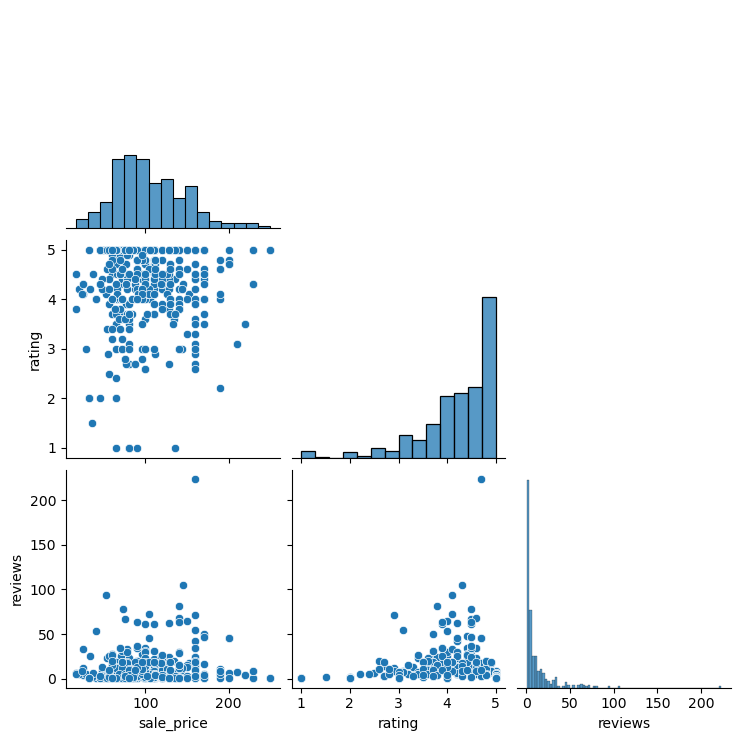

In [22]:
sns.pairplot(nikeCleaner, corner = True)
plt.show()

C:\Users\mckay\AppData\Local\Temp\ipykernel_25376\56932374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nikeCleaner.corr(), annot = True)


<Axes: >

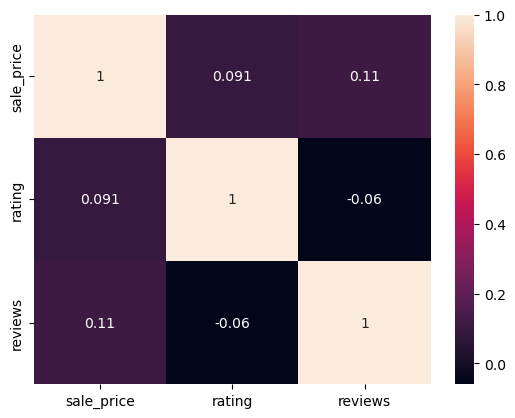

In [23]:
sns.heatmap(nikeCleaner.corr(), annot = True)